<a href="https://colab.research.google.com/github/eumatheusfds/IA-Project/blob/main/IA_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho Final - Inteligência artificial** 📚 🤖 💻



---
### Matheus Fernandes de Sousa - 20180020858
### Reginaldo André Sousa Rodrigues - 20180116206


Os laptops se tornaram essenciais em nosso mundo impulsionado pela tecnologia, principalmente no mundo pós-pandemia onde os valores dispararam. Desse modo, determinar o preço certo pode ser um desafio em meio à variedade de marcas e modelos disponíveis. Para resolver isso, empregamos aprendizado de máquina, especificamente regressão linear, para fornecer informações valiosas. Ao explorar um conjunto de dados contendo informações de laptops, pretendemos construir um modelo preditivo que estime os preços de laptops com base em seus recursos. O conjunto de dados compreende 19 colunas, incluindo recursos como marca, tipo de processador, RAM, capacidade de armazenamento e outras especificações, juntamente com seus preços correspondentes.

O processo começa compreendendo o conjunto de dados, explorando suas colunas e obtendo informações sobre as relações entre diferentes recursos e preços de laptops. Vamos pré-processar os dados, convertendo variáveis ​​categóricas em representações numéricas e dimensionando os dados, se necessário. Posteriormente, dividiremos o conjunto de dados em conjuntos de treinamento e teste para avaliar o desempenho de nosso modelo com precisão.

Esses insights beneficiam os consumidores nas decisões de compra e auxiliam os fabricantes e varejistas em preços competitivos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

## Importando os dados

In [ ]:
# Importando a base de dados
url = 'https://raw.githubusercontent.com/eumatheusfds/IA-Projects/main/laptopPrice.csv'
df = pd.read_csv(url)

## Visão geral

In [ ]:
# Display dos dados
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
# Número de instâncias (linhas) e atributos (colunas), respectivamente.
print(df.shape)

(823, 19)


In [ ]:
# Visão geral do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [ ]:
# Overview das colunas
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,823,8,ASUS,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
processor_brand,823,3,Intel,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
processor_name,823,11,Core i5,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
processor_gnrtn,823,8,11th,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ram_gb,823,4,8 GB,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ram_type,823,6,DDR4,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssd,823,7,512 GB,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hdd,823,4,0 GB,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,823,3,Windows,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os_bit,823,2,64-bit,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A coluna referente ao atributo 'Price', ou seja, o preço dos computadores, está com base na moeda indiana, a rupia. Desse modo, achamos pertinente fazer a conversão para o real brasileiro, para termos uma noção melhor da aplicação. Para essa conversão, estamos usando o valor de:

1 Rupia = 0.059 Reais(Valor a partir da cotação do dia 07/06/2023)

In [ ]:
df['Price'] = df['Price'] * 0.059

Explorando as relações e correlações nas colunas numéricas

<Figure size 640x480 with 0 Axes>

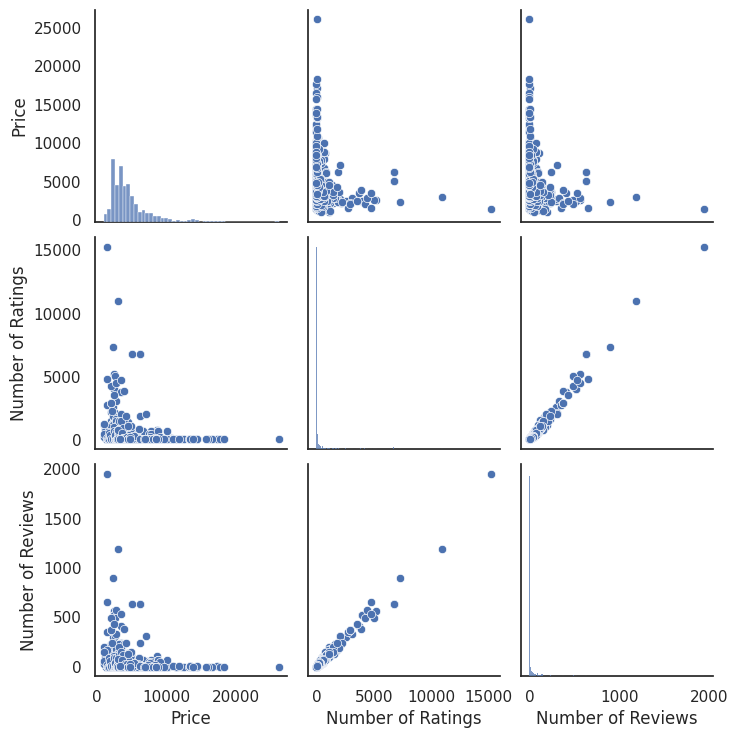

In [ ]:
sns.set_theme(style="white")
sns.despine()

sns.pairplot(df);

O preço não parece ter nenhuma correlação linear com nenhuma dessas colunas.
Mas há uma correlação positiva entre o número de avaliações e o número de avaliações.
Outliers tornam difícil ver a distribuição das colunas.

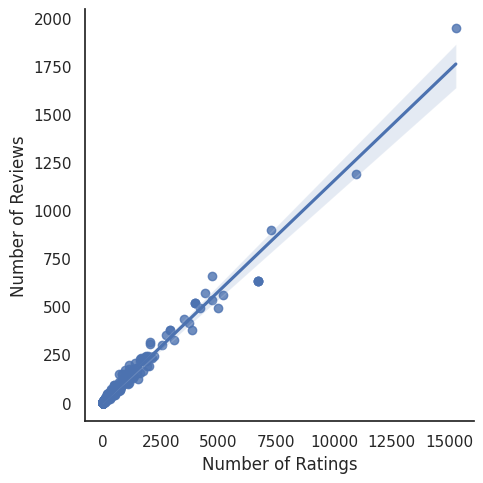

In [ ]:
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=df)

Como vemos, há uma enorme correlação entre number of reviews e number of ratings.

## Data cleaning & Feature Engineering

### Data Cleaning

In [ ]:
# Overview dos dados faltantes
df.isnull().sum().sort_values()

brand                0
rating               0
Price                0
msoffice             0
Touchscreen          0
warranty             0
weight               0
graphic_card_gb      0
Number of Ratings    0
os_bit               0
hdd                  0
ssd                  0
ram_type             0
ram_gb               0
processor_gnrtn      0
processor_name       0
processor_brand      0
os                   0
Number of Reviews    0
dtype: int64

In [ ]:
# Dados duplicados
df.duplicated().sum()

21

In [ ]:
# Dropando dados duplicados
df = df.drop_duplicates()

In [ ]:
# Overview dos dados atualizados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              802 non-null    object 
 1   processor_brand    802 non-null    object 
 2   processor_name     802 non-null    object 
 3   processor_gnrtn    802 non-null    object 
 4   ram_gb             802 non-null    object 
 5   ram_type           802 non-null    object 
 6   ssd                802 non-null    object 
 7   hdd                802 non-null    object 
 8   os                 802 non-null    object 
 9   os_bit             802 non-null    object 
 10  graphic_card_gb    802 non-null    object 
 11  weight             802 non-null    object 
 12  warranty           802 non-null    object 
 13  Touchscreen        802 non-null    object 
 14  msoffice           802 non-null    object 
 15  Price              802 non-null    float64
 16  rating             802 non

In [ ]:
# Descrição das colunas númericas.
df.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,4520.907075,299.84414,36.089776
std,2668.746081,1001.78442,118.313553
min,1002.410000,0.00000,0.000000
25%,2713.410000,0.00000,0.000000
50%,3775.410000,17.00000,2.000000
75%,5281.975000,140.25000,18.000000
max,26077.410000,15279.00000,1947.000000


#### O conjunto de dados tem 823 linhas e 19 colunas.
#### Todos os valores são não nulos.
#### O tipo de dados da maioria das colunas é objeto.
#### Preço, número de avaliações e número de comentários estão em números inteiros.
#### Parece que há outliers em todas as 3 colunas numéricas.

#### Detecção e tratamento de outliers

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Atributos numéricos: ", numeric_features)
print("Atributos categóricos:", cat_features)

Atributos numéricos:  ['Price', 'Number of Ratings', 'Number of Reviews']
Atributos categóricos: ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


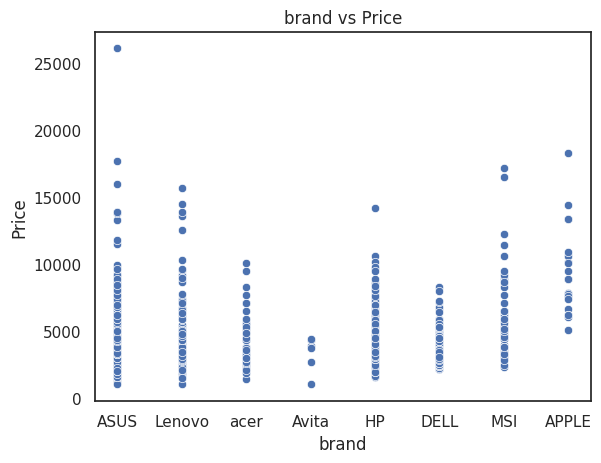

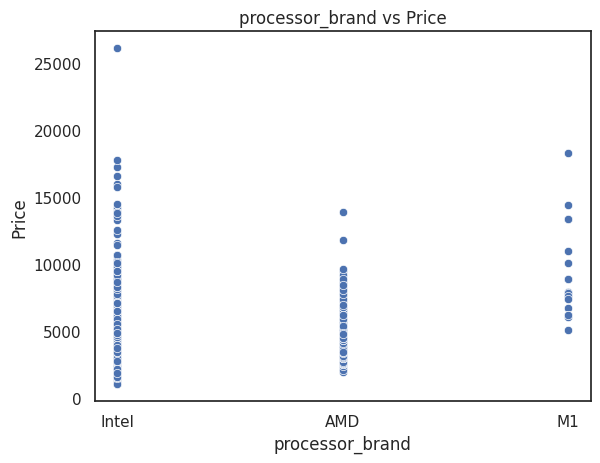

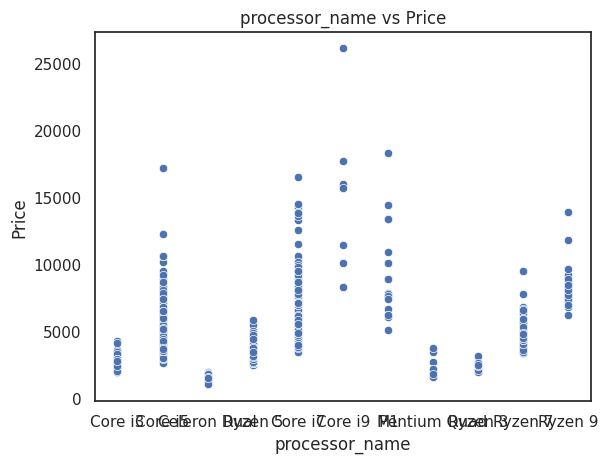

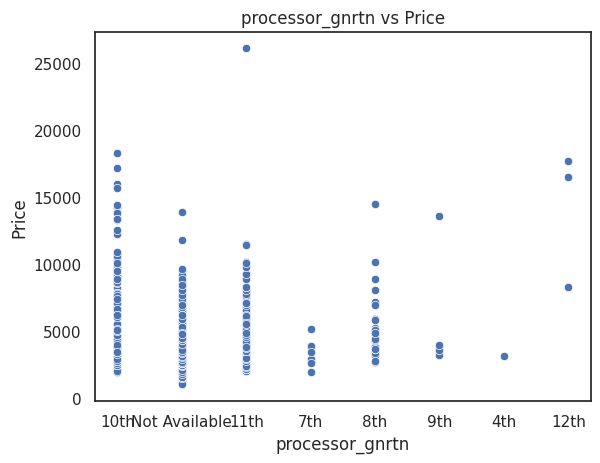

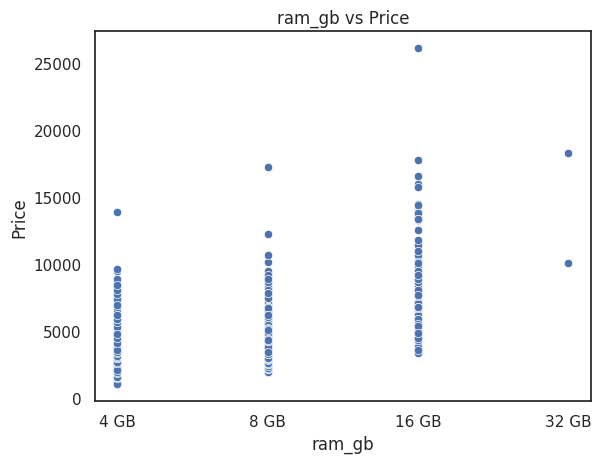

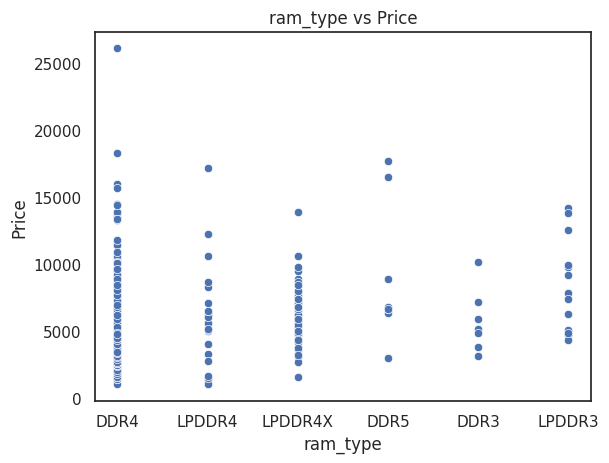

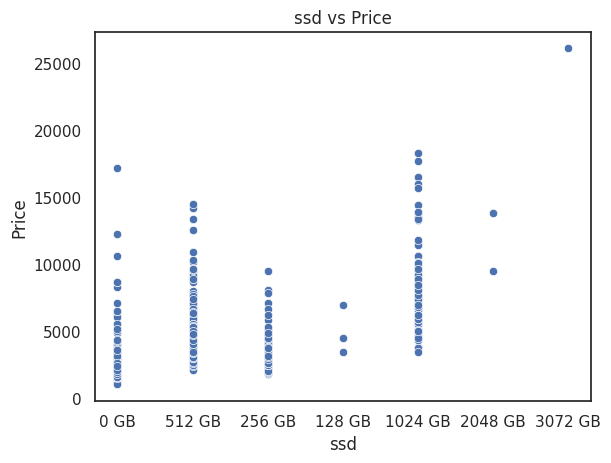

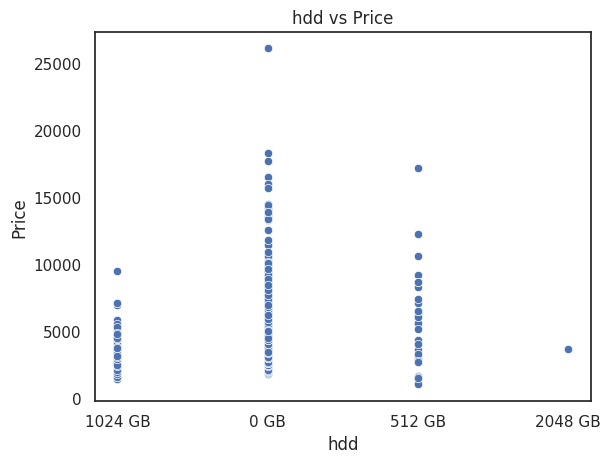

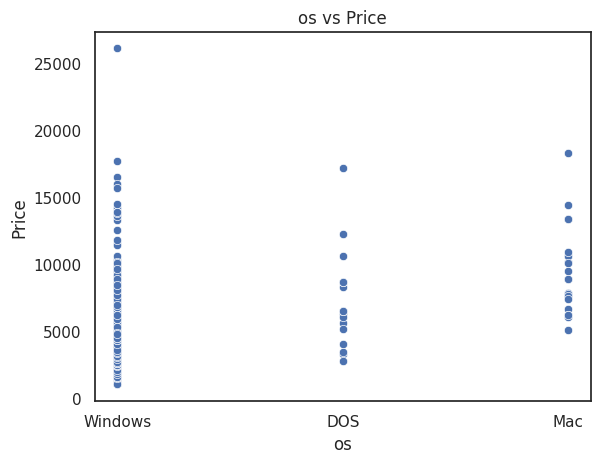

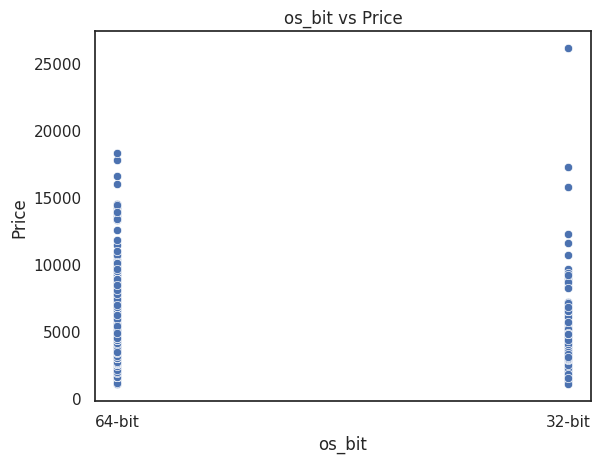

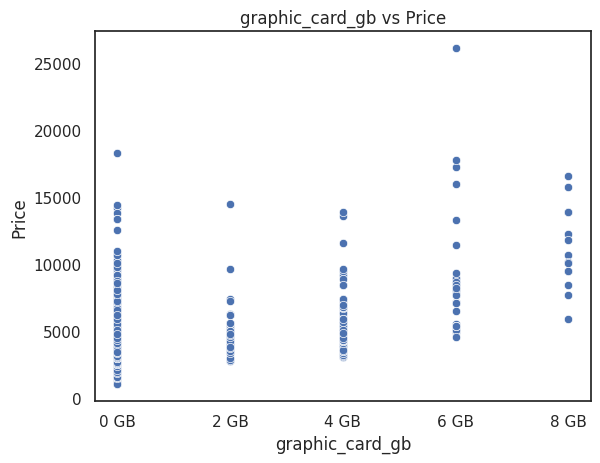

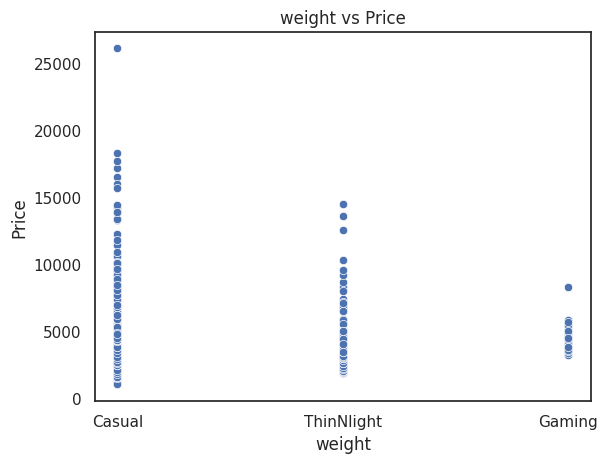

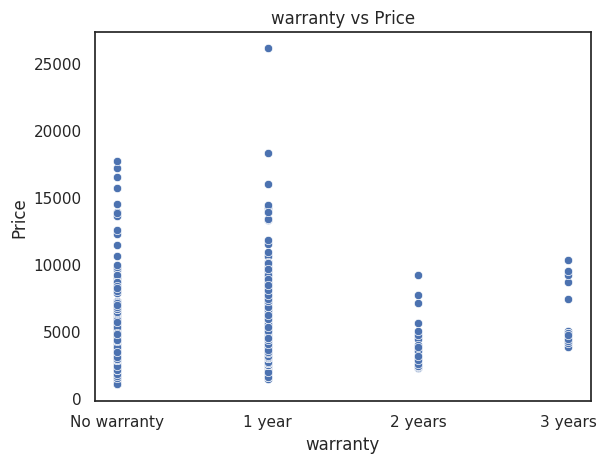

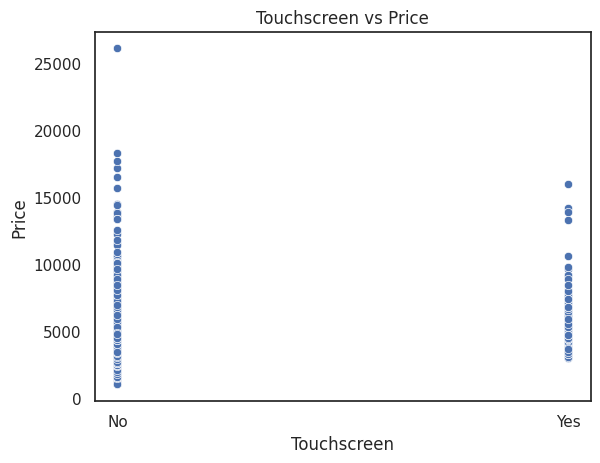

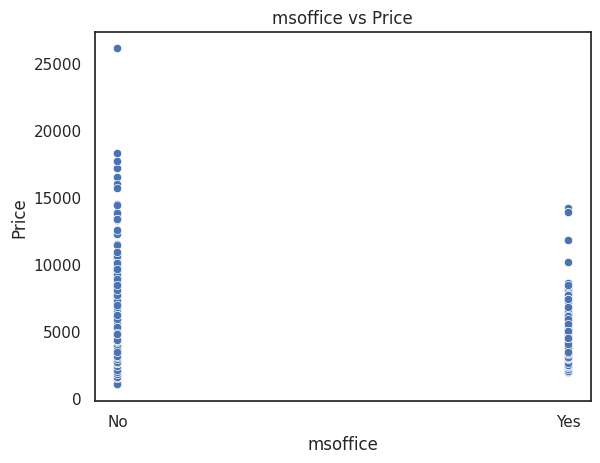

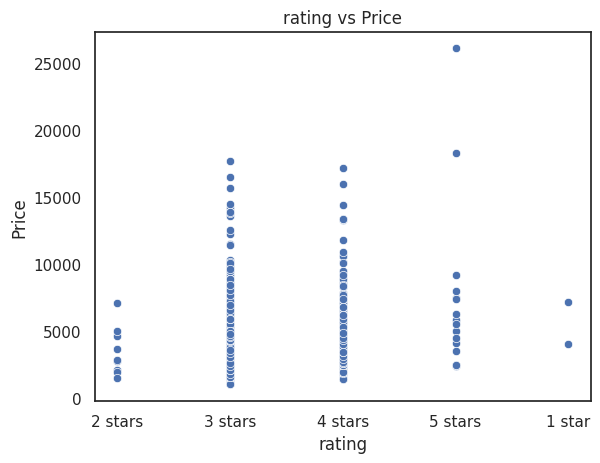

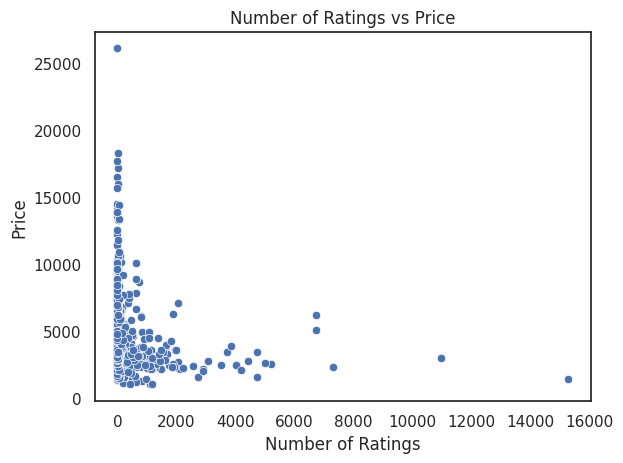

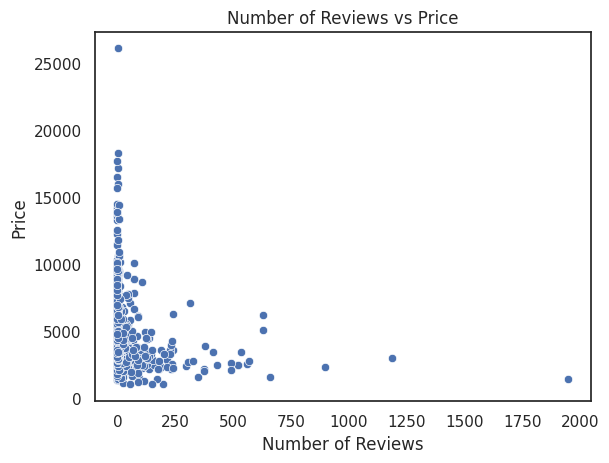

In [ ]:
output_attribute = 'Price'
# Selecionar todos os atributos, exceto o atributo de saída
input_attributes = df.drop(output_attribute, axis=1)

# Visualização dos gráficos de dispersão
for attribute in input_attributes.columns:
    sns.scatterplot(x=df[attribute], y=df[output_attribute])
    plt.title(f'{attribute} vs {output_attribute}')
    plt.savefig(f'{attribute}_vs_{output_attribute}.png')  # Salvar a imagem com um nome único
    plt.show()

#### Histogramas

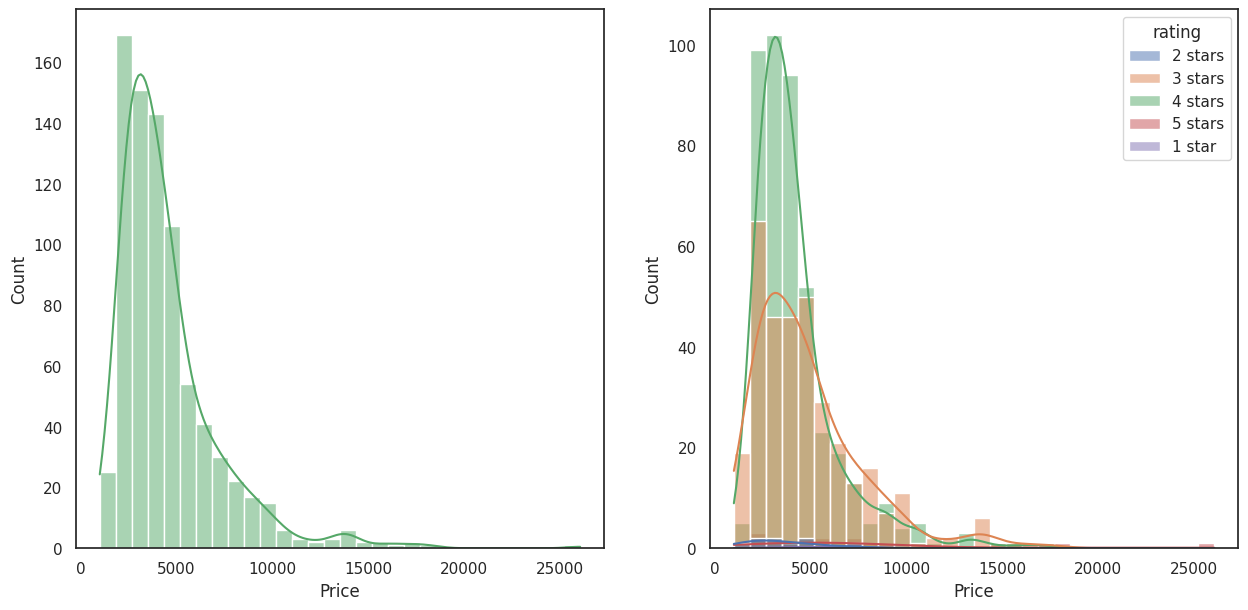

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'rating')
#Salvando os histogramas
plt.savefig('histograma1.png')
plt.savefig('histograma2.png')
plt.show()

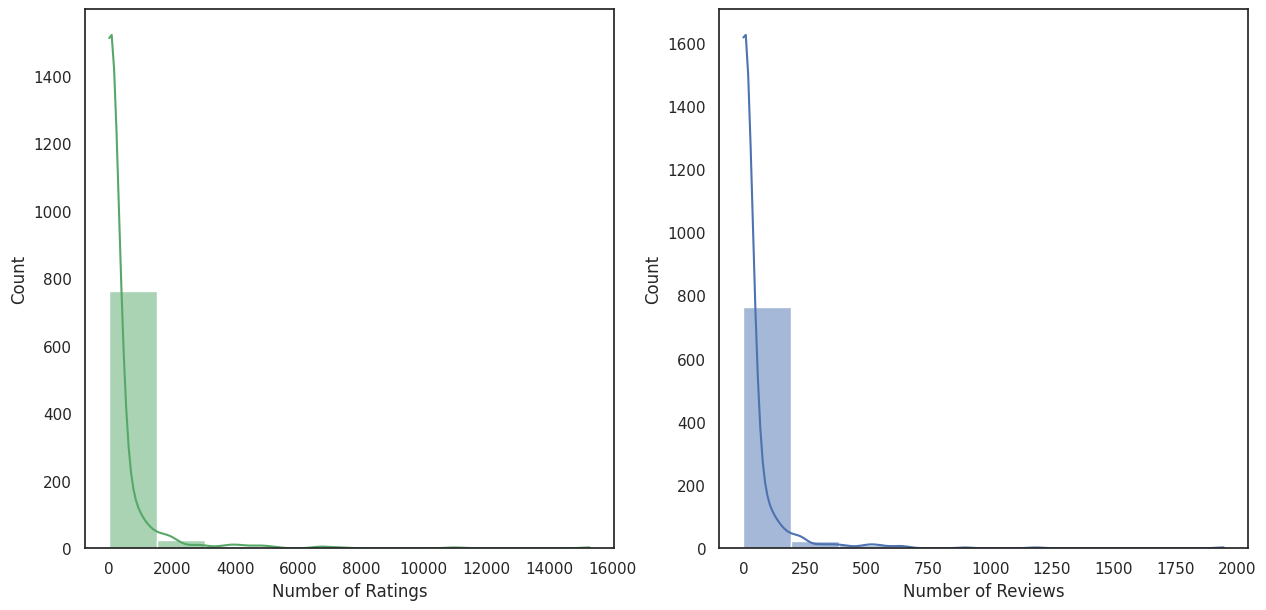

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Number of Ratings',bins=10,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Number of Reviews',kde=True, bins = 10)
plt.show()

In [ ]:
df.loc[df['Price'].nlargest(10).index]


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
594,ASUS,Intel,Core i9,11th,16 GB,DDR4,3072 GB,0 GB,Windows,32-bit,6 GB,Casual,1 year,No,No,26077.410,5 stars,1,1
621,APPLE,M1,M1,10th,32 GB,DDR4,1024 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,18289.410,5 stars,3,1
590,ASUS,Intel,Core i9,12th,16 GB,DDR5,1024 GB,0 GB,Windows,64-bit,6 GB,Casual,No warranty,No,No,17699.410,3 stars,0,0
433,MSI,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,DOS,32-bit,6 GB,Casual,No warranty,No,No,17180.210,4 stars,7,3
547,MSI,Intel,Core i7,12th,16 GB,DDR5,1024 GB,0 GB,Windows,64-bit,8 GB,Casual,No warranty,No,No,16519.410,3 stars,0,0
591,ASUS,Intel,Core i9,10th,16 GB,DDR4,1024 GB,0 GB,Windows,64-bit,6 GB,Casual,1 year,Yes,No,15929.410,4 stars,8,1
593,Lenovo,Intel,Core i9,10th,16 GB,DDR4,1024 GB,0 GB,Windows,32-bit,8 GB,Casual,No warranty,No,No,15693.882,3 stars,0,0
523,Lenovo,Intel,Core i7,8th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,2 GB,ThinNlight,No warranty,No,No,14443.259,3 stars,0,0
620,APPLE,M1,M1,10th,16 GB,DDR4,1024 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,14395.410,4 stars,42,8
507,HP,Intel,Core i7,10th,16 GB,LPDDR3,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,Yes,14145.781,3 stars,0,0


In [ ]:
df.loc[df['Price'].nsmallest(10).index]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
194,Lenovo,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,1002.41,3 stars,414,54
12,Avita,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,1031.91,3 stars,1120,196
189,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,1061.41,3 stars,1180,148
188,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,1120.41,3 stars,197,25
170,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,1208.91,3 stars,637,91
163,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,1267.91,3 stars,818,113
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,1297.41,3 stars,31,3
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,1356.41,3 stars,0,0
84,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,1385.91,4 stars,632,92
21,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,1415.41,3 stars,15279,1947


In [ ]:
df.loc[df['ssd']=='3072 GB']

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
594,ASUS,Intel,Core i9,11th,16 GB,DDR4,3072 GB,0 GB,Windows,32-bit,6 GB,Casual,1 year,No,No,26077.41,5 stars,1,1


###Transformação de atributos categóricos

In [ ]:
#Substituindo e normalizando o atributo de ram
np.unique(df['ram_gb'])
df['ram_gb'] = df['ram_gb'].replace({'32 GB': 1.0,
                                     '16 GB': 0.66,
                                     '8 GB':  0.33,
                                     '4 GB':  0.0})

In [ ]:
np.unique(df['ram_type'])
df['ram_type'] = df['ram_type'].replace({'LPDDR3':0.0,
                                         'DDR3':0.2,
                                         'LPDDR4':0.4,
                                         'LPDDR4X':0.6,
                                         'DDR4':0.8,
                                         'DDR5':1.0})


In [ ]:
np.unique(df['ssd'])
df['ssd'] = df['ssd'].replace({'0 GB':0.0,
                               '128 GB':0.16,
                               '256 GB':0.33,
                               '512 GB':0.5,
                               '1024 GB':0.66,
                               '2048 GB':0.83,
                               '3072 GB':1.0})

In [ ]:
np.unique(df['hdd'])
df['hdd'] = df['hdd'].replace({'0 GB':0.0,
                               '512 GB':0.33,
                               '1024 GB':0.66,
                               '2048 GB':1.0})

In [ ]:
np.unique(df['os_bit'])
df['os_bit'] = df['os_bit'].replace({'32-bit': 0.0,
                                     '64-bit': 1.0})

In [ ]:
np.unique(df['graphic_card_gb'])
df['graphic_card_gb'] = df['graphic_card_gb'].replace({'0 GB':0.0,
                                                       '2 GB':0.25,
                                                       '4 GB':0.5,
                                                       '6 GB':0.75,
                                                       '8 GB':1.0})

In [ ]:
np.unique(df['warranty'])
df['warranty'] = df['warranty'].replace({'No warranty': 0.0,
                                         '1 year':0.33,
                                         '2 years':0.66,
                                         '3 years':1.0})

In [ ]:
np.unique(df['Touchscreen'])
df['Touchscreen'] = df['Touchscreen'].replace({'No':0.0,
                                               'Yes':1.0})

In [ ]:
np.unique(df['msoffice'])
df['msoffice'] = df['msoffice'].replace({'No':0.0,
                                         'Yes':1.0})

In [ ]:
np.unique(df['rating'])
df['rating'] = df['rating'].replace({'1 star':0.0,
                                     '2 stars':0.25,
                                     '3 stars':0.5,
                                     '4 stars':0.75,
                                     '5 stars':1.0})

In [ ]:
np.unique(df['weight'])
df['weight'] = df['weight'].replace({'ThinNlight':0.0,
                                     'Casual':0.5,
                                     'Gaming':1.0})

In [ ]:
df = df.reset_index(drop=True)
max = df['Number of Ratings'].max()
min = df['Number of Ratings'].min()
for i in range(0, len(df)):
  df.at[i, 'Number of Ratings'] = (df.at[i, 'Number of Ratings']-min)/(max-min)
max = df['Number of Reviews'].max()
min = df['Number of Reviews'].min()
for i in range(0, len(df)):
  df.at[i, 'Number of Reviews'] = (df.at[i, 'Number of Reviews']-min)/(max-min)

In [ ]:
#Usando One Hot Encoder para as variáveis categóricas
ohe = OneHotEncoder()
#Atributo 'brand'
feature_array = ohe.fit_transform(df[['brand']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
for i in range(0, len(feature_labels)):
  feature_labels[i] = 'brand_'+feature_labels[i]
features = pd.DataFrame(feature_array, columns = feature_labels)
df = pd.concat([df, features], axis=1)

feature_array = ohe.fit_transform(df[['processor_name']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
for i in range(0, len(feature_labels)):
  feature_labels[i] = 'processor_name_'+feature_labels[i]
features = pd.DataFrame(feature_array, columns = feature_labels)
df = pd.concat([df, features], axis=1)

feature_array = ohe.fit_transform(df[['processor_gnrtn']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
for i in range(0, len(feature_labels)):
  feature_labels[i] = 'gnrtn_'+feature_labels[i]
features = pd.DataFrame(feature_array, columns = feature_labels)
df = pd.concat([df, features], axis=1)

feature_array = ohe.fit_transform(df[['os']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
for i in range(0, len(feature_labels)):
  feature_labels[i] = 'os_'+feature_labels[i]
features = pd.DataFrame(feature_array, columns = feature_labels)
df = pd.concat([df, features], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        802 non-null    object 
 1   processor_brand              802 non-null    object 
 2   processor_name               802 non-null    object 
 3   processor_gnrtn              802 non-null    object 
 4   ram_gb                       802 non-null    float64
 5   ram_type                     802 non-null    float64
 6   ssd                          802 non-null    float64
 7   hdd                          802 non-null    float64
 8   os                           802 non-null    object 
 9   os_bit                       802 non-null    float64
 10  graphic_card_gb              802 non-null    float64
 11  weight                       802 non-null    float64
 12  warranty                     802 non-null    float64
 13  Touchscreen         

In [ ]:
df = df.drop(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'os'], axis='columns')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ram_gb,ram_type,ssd,hdd,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,processor_name_Celeron Dual,processor_name_Core i3,processor_name_Core i5,processor_name_Core i7,processor_name_Core i9,processor_name_M1,processor_name_Pentium Quad,processor_name_Ryzen 3,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,gnrtn_10th,gnrtn_11th,gnrtn_12th,gnrtn_4th,gnrtn_7th,gnrtn_8th,gnrtn_9th,gnrtn_Not Available,os_DOS,os_Mac,os_Windows
ram_gb,1.000000,-0.098122,0.339423,-0.164398,0.132431,0.253965,0.093299,0.069306,0.062417,0.011232,0.458266,0.053299,-0.103705,-0.108785,0.140916,-0.057822,0.007028,-0.065532,0.022492,-0.026404,0.115612,0.006871,-0.218351,-0.315741,0.163098,0.529513,0.168240,0.128818,-0.143095,-0.094619,-0.147157,-0.109185,-0.124465,0.038297,0.253807,0.091551,0.002860,-0.049234,0.077665,0.027476,-0.358049,0.024150,0.140916,-0.125045
ram_type,-0.098122,1.000000,0.042038,0.043973,0.109088,0.074242,0.012780,0.098813,-0.082757,0.052447,-0.202435,0.041836,0.060335,0.051543,-0.008956,-0.164273,0.026807,0.098706,0.075175,0.050065,-0.027399,-0.018501,-0.143315,0.150439,-0.085171,-0.178624,0.048351,0.048098,-0.015005,0.056518,0.081427,0.084598,-0.011658,-0.139246,0.134051,0.075433,-0.135733,-0.026661,-0.153573,0.026807,0.057652,-0.313698,-0.008956,0.210883
ssd,0.339423,0.042038,1.000000,-0.736745,0.278967,0.225810,0.077041,0.217823,0.198379,0.127785,0.473282,0.091859,-0.197658,-0.203926,0.094093,0.067068,0.002772,-0.123112,0.018211,0.029252,0.034026,-0.103146,-0.298813,-0.290844,-0.022585,0.260824,0.146117,0.075416,-0.138927,-0.133265,0.059688,0.181498,0.227928,-0.148265,0.154537,0.076301,-0.071487,-0.134751,-0.095794,0.026419,0.034875,-0.266585,0.094093,0.100294
hdd,-0.164398,0.043973,-0.736745,1.000000,-0.148429,-0.064556,0.036452,-0.146315,-0.196111,-0.100493,-0.252217,-0.074086,0.120747,0.128240,-0.095817,-0.008031,-0.030489,0.142791,-0.054422,-0.075750,-0.060740,0.126855,0.098524,0.160115,0.042580,-0.118696,-0.055973,-0.086865,0.038502,0.072346,-0.050539,-0.104297,-0.102071,0.103405,-0.086876,-0.034169,0.067834,0.113727,0.054999,0.023284,-0.057961,0.086130,-0.095817,0.018357
os_bit,0.132431,0.109088,0.278967,-0.148429,1.000000,-0.102250,-0.142527,0.276241,0.090201,0.168339,-0.019731,0.089524,-0.005161,-0.009546,0.068146,-0.055215,0.034432,0.067830,0.043474,-0.051465,-0.018126,-0.030843,-0.171657,-0.019243,-0.003055,0.044781,-0.033418,0.061779,0.022095,0.072594,0.001737,-0.019831,0.031507,-0.102014,0.078288,0.024302,0.014013,-0.041019,0.066909,0.034432,-0.020729,-0.333730,0.068146,0.164078
graphic_card_gb,0.253965,0.074242,0.225810,-0.064556,-0.102250,1.000000,0.452986,-0.042701,-0.106960,-0.118874,0.467499,0.037722,-0.018904,-0.014043,-0.102463,0.056210,-0.051772,-0.127756,-0.035015,-0.040181,0.240449,0.064935,-0.102463,-0.295802,0.020931,0.239039,0.259846,-0.092890,-0.076543,-0.109151,-0.035877,0.162662,0.180623,0.052486,-0.098376,0.163628,-0.021070,-0.016544,-0.019719,0.118396,0.026421,0.185827,-0.102463,-0.041298
weight,0.093299,0.012780,0.077041,0.036452,-0.142527,0.452986,1.000000,-0.080372,0.097393,-0.139723,0.211155,0.025305,-0.000783,0.006021,0.085031,0.196050,-0.090590,-0.201541,-0.076922,0.003619,0.070484,-0.031390,0.043659,-0.211683,0.010274,0.108801,0.072834,0.077086,-0.009386,-0.143342,-0.015327,0.126552,0.090581,0.059142,-0.065869,0.030323,0.017485,-0.003055,-0.130885,0.069674,0.056688,0.021222,0.085031,-0.079777
warranty,0.069306,0.098813,0.217823,-0.146315,0.276241,-0.042701,-0.080372,1.000000,0.189503,0.441124,0.058294,0.159772,0.057115,0.052559,0.078568,-0.121816,-0.105943,-0.050315,0.061705,0.117627,0.014353,-0.000845,-0.197143,-0.042376,0.046332,0.021411,-0.017246,0.071228,-0.007561,-0.034403,0.037363,0.019081,0.012837,-0.009112,0.061800,-0.074772,-0.043116,-0.069529,0.015769,-0.008849,-0.036465,-0.144183,0.078568,0.032767
Touchscreen,0.062

In [ ]:
df = df.drop(['Number of Reviews'], axis='columns')

##Amostragem

In [ ]:
df_X = df.drop(['Price'], axis='columns')
df_Y = df['Price']

kf = KFold(n_splits=4)
for train, test in kf.split(df_X):
  trainX = df_X.iloc[train]
  trainY = df_Y.iloc[train]
  testX = df_X.iloc[test]
  testY = df_Y.iloc[test]
print(trainX.shape, testX.shape)

(602, 42) (200, 42)


##Gradient Boosting

In [ ]:
best = 0
minor = 0
for i in range(0, 300):
  grad = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=i)
  grad.fit(trainX, trainY)
  pred = grad.predict(testX)

  rmse = mean_squared_error(testY, pred, squared=False)
  if i==0:
    minor = rmse
  else:
    if rmse <= minor:
      best=i
      minor=rmse

print("best: ", best)
print("minor: ", minor)

best:  193
minor:  1644.7459180538551


In [ ]:
#best = 0
#minor = 0
#for i in range(0, 300):
grad = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=193)
grad.fit(trainX, trainY)
pred = grad.predict(testX)

rmse = mean_squared_error(testY, pred, squared=False)
# if i==0:
#    minor = rmse
#  else:
#    if rmse <= minor:
#      best=i
#      minor=rmse

#print("best: ", best)
#print("minor: ", minor)

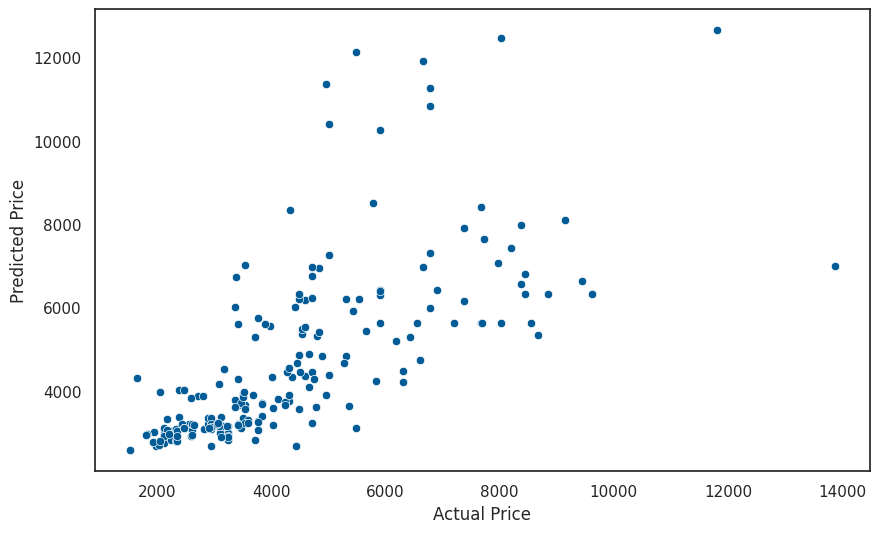

In [ ]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= testY, y= pred, color= '#005b96')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# **Referências:**

[Kaggle Laptop Prices Dataset](https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset?select=laptopPrice.csv)

[Gradient Boosting](https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/)